## Model Prediksi Risiko Kredit (Credit Risk Prediction)

## Import Library

Tahapan pertama adalah mengimpor berbagai pustaka Python yang umum digunakan untuk analisis data, pemrosesan fitur, dan pemodelan machine learning. `numpy` dan `pandas` digunakan untuk manipulasi data numerik dan tabular, sementara `seaborn` dan `matplotlib` berfungsi untuk visualisasi data. `shap` digunakan untuk interpretabilitas model. Beberapa algoritma klasifikasi yang diimpor meliputi SVM (`SVC`), Random Forest (`RandomForestClassifier`), Gaussian Naive Bayes (`GaussianNB`), dan XGBoost (`XGBClassifier`). Untuk mengatasi ketidakseimbangan kelas, ada teknik oversampling SMOTE. Fitur juga dipersiapkan dengan normalisasi menggunakan `MinMaxScaler` dan imputasi nilai hilang dengan `SimpleImputer`. Label data dikodekan dengan `LabelEncoder`, dan data dibagi menjadi set pelatihan dan pengujian menggunakan `train_test_split`. Terakhir, evaluasi model dilakukan dengan metrik seperti akurasi, laporan klasifikasi, dan matriks kebingungan.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Loading

Tahap kedua adalah tahap data loading, di mana data yang diambil dari sumber (https://www.kaggle.com/datasets/preethamgouda/financial-risk) akan dimasukan ke dalam dataframe. Baris kode ini membaca file data berformat CSV bernama "financial\_risk\_assessment.csv" dan memuatnya ke dalam sebuah DataFrame `df` menggunakan pustaka pandas, sehingga data tersebut dapat dengan mudah dianalisis dan diproses lebih lanjut dalam Python.

In [2]:
df = pd.read_csv("financial_risk_assessment.csv")

## Exploratory Data Analysis

Tahap ketiga adalah tahapan melihat statistik dari dataset yang sudah diambil, apakah ada nilai null dan duplicate atau tidak. Selain itu, kita juga dapat melakukan eksplorasi mengenai dataset yang kita miliki.

menggunakan .head() untuk menampilkan 5 baris pertama dari DataFrame bernama df

In [3]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


Data tersebut adalah contoh cuplikan dataset penilaian risiko keuangan dengan berbagai fitur seperti usia, jenis kelamin, tingkat pendidikan, status pernikahan, pendapatan, skor kredit, jumlah pinjaman, tujuan pinjaman, status pekerjaan, lama bekerja, riwayat pembayaran, rasio utang terhadap pendapatan, nilai aset, jumlah tanggungan, lokasi geografis (kota, negara bagian, negara), jumlah gagal bayar sebelumnya, perubahan status pernikahan, dan kolom target yaitu tingkat risiko (Risk Rating) yang dikategorikan misalnya Low, Medium, atau High. Data ini dapat digunakan untuk membangun model prediksi risiko kredit.

Menggunakan .info() untuk memberikan ringkasan informasi tentang DataFrame df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

Dataset ini berisi 15.000 baris data dengan 20 kolom fitur yang mencakup informasi demografis, keuangan, dan pinjaman, termasuk usia, jenis kelamin, tingkat pendidikan, status pernikahan, pendapatan, skor kredit, jumlah pinjaman, dan rating risiko kredit sebagai target. Beberapa kolom numerik seperti pendapatan, skor kredit, dan nilai aset memiliki nilai hilang (sekitar 12.750 non-null), sedangkan kolom lain seperti status pekerjaan dan lokasi lengkap terisi penuh. Data terdiri dari tipe numerik (int64, float64) dan kategorikal (object), dengan ukuran memori sekitar 2,3 MB, siap untuk analisis dan pemodelan risiko keuangan.

Menggunakan .describe untuk memberikan ringkasan statistik deskriptif dari kolom-kolom numerik dalam DataFrame df.

In [5]:
df.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


Hasil `.describe()` ini memberikan ringkasan statistik untuk beberapa kolom numerik pada dataset. Secara umum, data usia (Age) berkisar antara 18 sampai 69 tahun dengan rata-rata sekitar 43 tahun dan penyebaran (std) sekitar 15 tahun. Pendapatan (Income) rata-rata sekitar 69.933 dengan rentang dari 20.005 sampai hampir 120.000, menunjukkan variasi cukup besar. Skor kredit (Credit Score) rata-rata sekitar 699, dengan nilai minimum 600 dan maksimum 799. Jumlah pinjaman (Loan Amount) rata-rata sekitar 27.450, dengan variasi cukup besar hingga hampir 50.000. Lama bekerja di pekerjaan saat ini (Years at Current Job) rata-rata hampir 9,5 tahun, dengan rentang dari 0 sampai 19 tahun. Rasio utang terhadap pendapatan (Debt-to-Income Ratio) rata-rata sekitar 0,35, berkisar dari 0,1 sampai hampir 0,6. Nilai aset (Assets Value) bervariasi dengan rata-rata sekitar 159.741 dan rentang 20.055 sampai hampir 300.000. Jumlah tanggungan (Number of Dependents) rata-rata sekitar 2 orang, dengan maksimum 4. Jumlah catatan gagal bayar sebelumnya (Previous Defaults) rata-rata sekitar 2, dan perubahan status pernikahan (Marital Status Change) biasanya antara 0 sampai 2, dengan rata-rata hampir 1. Statistik ini menunjukkan variasi yang cukup besar di beberapa fitur, yang penting untuk analisis risiko dan pemodelan.

Menggunakan .isna() dan .sum() untuk mengecek jumlah nilai missing (atau NaN) di setiap kolom DataFrame df

In [6]:
df.isna().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

Hasil `isna().sum()` ini menunjukkan jumlah nilai yang hilang (missing values) pada setiap kolom dalam dataset. Kolom seperti **Income, Credit Score, Loan Amount, Assets Value, Number of Dependents, dan Previous Defaults** masing-masing memiliki 2250 nilai yang kosong atau tidak terisi, yang berarti sekitar 15% dari total 15.000 data pada kolom tersebut tidak lengkap. Sedangkan kolom-kolom lain seperti **Age, Gender, Education Level, Marital Status, Loan Purpose, Employment Status, Years at Current Job, Payment History, Debt-to-Income Ratio, City, State, Country, Marital Status Change, dan Risk Rating** tidak memiliki missing value sama sekali. Ini menandakan data tersebut sudah lengkap pada kolom-kolom tersebut dan hanya perlu perhatian khusus pada kolom dengan nilai hilang saat melakukan analisis atau pemodelan.

Menggunakan .duplicated() dan .sum() untuk mengecek jumlah dumplikasi di setiap kolom DataFrame df

In [7]:
df.duplicated().sum()

0

Hasil dari .duplicated().sum() menunjukan bahwa tidak ada dataset yang merupakan duplikasi.

##### **Perbandingan Credit Score dan Risk Rating**
Kemudian membuat **boxplot** menggunakan library seaborn (`sns`) untuk memvisualisasikan distribusi **Credit Score** berdasarkan kategori **Risk Rating** pada DataFrame `df`.

* `x='Risk Rating'` berarti sumbu x menunjukkan kategori Risk Rating (misalnya rendah, sedang, tinggi atau nilai kategorikal lain).
* `y='Credit Score'` berarti sumbu y menampilkan nilai numerik Credit Score.
* Boxplot akan menunjukkan median, kuartil, dan potensi outlier Credit Score pada tiap kategori Risk Rating.
* `plt.title()` memberi judul grafik, dan `plt.show()` menampilkan plotnya.

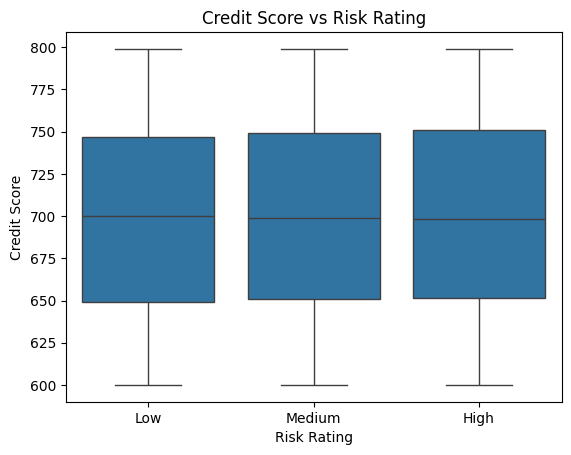

In [8]:
sns.boxplot(x='Risk Rating', y='Credit Score', data=df)
plt.title('Credit Score vs Risk Rating')
plt.show()

Boxplot ini menunjukkan distribusi skor kredit (Credit Score) berdasarkan kategori risiko (Risk Rating) Low, Medium, dan High. Dari grafik terlihat bahwa rentang nilai skor kredit untuk ketiga kategori risiko tersebut hampir sama, dengan median sekitar 700 dan rentang antara 600 sampai 800. Hal ini mengindikasikan bahwa skor kredit saja tidak terlalu membedakan ketiga tingkat risiko secara signifikan dalam data ini.

##### **Risk Rating by Employment Status**
Kemudian membuat **countplot** menggunakan seaborn (`sns`) untuk menampilkan frekuensi (jumlah) data pada tiap kategori **Risk Rating**, dan membaginya berdasarkan **Employment Status** sebagai *hue* (warna pembeda).

* `x='Risk Rating'` menampilkan kategori Risk Rating pada sumbu x.
* `hue='Employment Status'` membagi setiap bar Risk Rating menjadi beberapa warna berdasarkan status pekerjaan (misalnya employed, unemployed, dll).
* `plt.title()` memberikan judul grafik, dan `plt.show()` menampilkan visualisasinya.

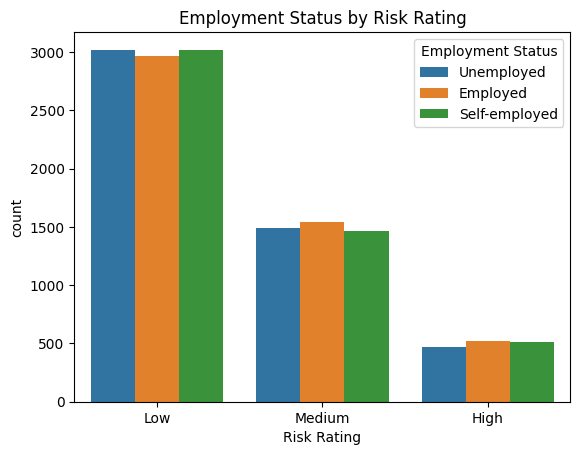

In [9]:
sns.countplot(x='Risk Rating', hue='Employment Status', data=df)
plt.title('Employment Status by Risk Rating')
plt.show()

Grafik ini menampilkan grafik batang yang menggambarkan hubungan antara status pekerjaan dan tingkat penilaian risiko. Grafik menunjukkan bahwa sebagian besar individu—baik yang menganggur, bekerja, maupun wiraswasta—berada dalam kategori risiko rendah, dengan jumlah sekitar 3000 orang per status pekerjaan. Sementara itu, jumlahnya menurun pada kategori risiko sedang dan semakin berkurang pada kategori risiko tinggi, masing-masing sekitar 1500 dan 500 orang. Informasi dalam grafik ini bisa membantu memahami keterkaitan antara tingkat risiko dan kondisi ketenagakerjaan dalam suatu populasi.

##### **Korelasi untuk Setiap Numerical Feature**
Kemudian membuat **heatmap** korelasi antar fitur numerik di DataFrame `df` menggunakan seaborn (`sns`), dengan visualisasi sebagai berikut:

* `df.corr(numeric_only=True)` menghitung matriks korelasi Pearson antar kolom numerik saja.
* `sns.heatmap(..., annot=True, cmap='coolwarm')` menggambar peta warna (heatmap) yang menunjukkan nilai korelasi antar fitur, dengan angka korelasi ditampilkan (`annot=True`), dan menggunakan skema warna dari biru ke merah (`coolwarm`) untuk membedakan korelasi negatif dan positif.
* `plt.figure(figsize=(12, 8))` mengatur ukuran gambar supaya cukup besar dan jelas.
* `plt.title()` memberikan judul grafik.
* `plt.show()` menampilkan heatmap.

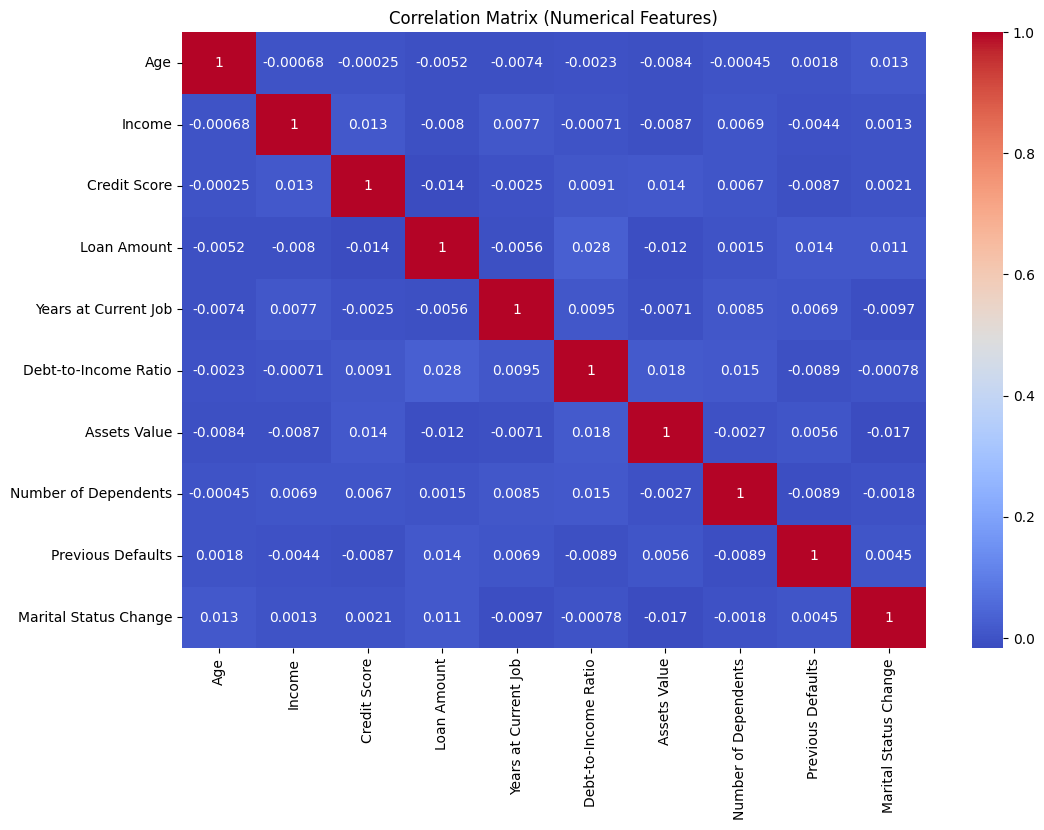

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

Hasil matriks korelasi tersebut menunjukkan bahwa semua fitur numerik dalam dataset memiliki korelasi yang sangat rendah atau hampir nol satu sama lain, dengan nilai korelasi berkisar sangat dekat dengan 0 kecuali diagonal utama yang bernilai 1 (korelasi sempurna dengan dirinya sendiri). Ini mengindikasikan bahwa tidak ada hubungan linear yang kuat atau signifikan antara variabel-variabel seperti usia, pendapatan, skor kredit, jumlah pinjaman, lama bekerja, rasio utang terhadap pendapatan, nilai aset, jumlah tanggungan, riwayat default, dan perubahan status pernikahan dalam data tersebut. Dengan kata lain, fitur-fitur ini cenderung independen secara linear satu sama lain.

##### **Distribusi dari Risk Rating**
Kemudian membuat **countplot** menggunakan seaborn (`sns`) untuk menampilkan distribusi frekuensi setiap kategori pada kolom **Risk Rating** di DataFrame `df`.

* `x='Risk Rating'` berarti di sumbu x ditampilkan kategori Risk Rating (misalnya rendah, sedang, tinggi).
* Setiap batang menunjukkan berapa banyak data yang termasuk di tiap kategori Risk Rating.
* `plt.title()` memberi judul grafik supaya jelas konteksnya.
* `plt.show()` menampilkan plot tersebut.

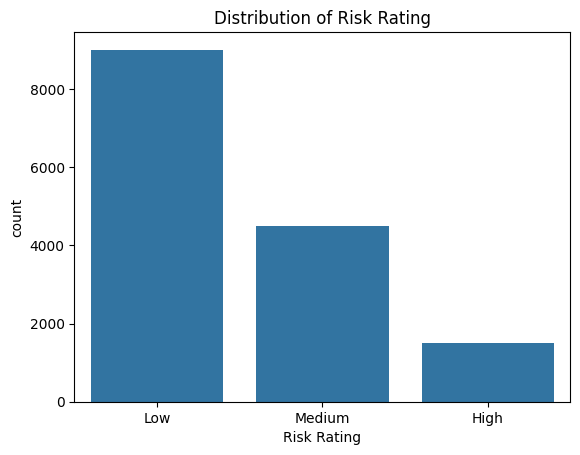

In [11]:
sns.countplot(x='Risk Rating', data=df)
plt.title('Distribution of Risk Rating')
plt.show()

Grafik ini menunjukkan distribusi rating risiko dengan tiga kategori: Low, Medium, dan High. Terlihat bahwa mayoritas data berada pada kategori Low dengan jumlah hampir 9.000, diikuti oleh Medium sekitar 4.500, dan kategori High yang paling sedikit dengan jumlah sekitar 1.500. Ini mengindikasikan bahwa sebagian besar entitas dalam dataset memiliki risiko rendah, sementara risiko tinggi jauh lebih jarang terjadi.

Dari hasil Asessing data, terdapat total 20 kolom, yaitu:
- Age : Usia individu dalam tahun. Merupakan variabel numerik kontinu yang dapat memengaruhi stabilitas keuangan dan kemampuan membayar pinjaman.
- Gender : Jenis kelamin individu. Kategori mencakup Male (Laki-laki), Female (Perempuan), dan Non-binary (Tidak terikat gender biner). Ini bisa berperan dalam analisis demografis dan pola risiko.
- Education Level : Tingkat pendidikan tertinggi yang telah dicapai, misalnya High School (SMA), Bachelor (S1), Master (S2), hingga PhD (Doktor). Tingkat pendidikan seringkali berhubungan dengan kemampuan finansial dan pekerjaan.
- Marital Status : Status pernikahan saat ini, dikategorikan sebagai Single (Belum menikah), Married (Menikah), Divorced (Bercerai), atau Widowed (Janda/Duda). Status ini dapat memengaruhi tanggungan dan stabilitas finansial.
- Income : Pendapatan tahunan dalam satuan USD. Mewakili kemampuan penghasilan individu untuk membayar kembali pinjaman.
- Credit Score : Skor kredit numerik yang menunjukkan kelayakan kredit individu, biasanya dalam rentang 600 sampai 800. Skor ini sering dipakai lembaga keuangan untuk menilai risiko kredit.
- Loan Amount : Jumlah pinjaman yang diminta oleh individu, dalam satuan uang. Ini merepresentasikan kebutuhan finansial yang ingin dipenuhi melalui pinjaman.
- Loan Purpose : Tujuan penggunaan pinjaman, dikategorikan sebagai Home (Rumah), Auto (Kendaraan), Personal (Pribadi), atau Business (Usaha). Tujuan ini bisa berdampak pada risiko peminjaman.
- Employment Status : Status pekerjaan saat ini, meliputi Employed (Bekerja), Unemployed (Menganggur), atau Self-employed (Wiraswasta). Status ini memberi gambaran tentang stabilitas penghasilan.
- Years at Current Job : Lama waktu individu bekerja di pekerjaan saat ini (dalam tahun). Durasi ini dapat mencerminkan kestabilan kerja dan potensi risiko kredit.

---

Dari hasil Asessing data juga dapat dilihat bahwa ada total 2250 row yang memiliki nilai null serta 0 duplicate. Selain itu tipe data dari masing-masing kolom sudah sesuai.

---

Berdasarkan keempat grafik EDA yang ditampilkan, didapatkan kesimpulan berikut:

## Distribusi Risiko
- **Low Risk**: 9,000 orang (mayoritas)
- **Medium Risk**: 4,500 orang
- **High Risk**: 1,500 orang (minoritas)

## Temuan Utama

**Status Pekerjaan vs Risiko:**
- Semua kategori risiko memiliki distribusi employment status yang relatif seimbang
- Tidak ada perbedaan signifikan antara unemployed, employed, dan self-employed dalam hal tingkat risiko

**Credit Score vs Risiko:**
- Credit score hampir identik di semua kategori risiko (median ~700)
- Rentang dan distribusi credit score sangat mirip, menunjukkan credit score mungkin bukan prediktor kuat untuk risk rating dalam dataset ini

**Korelasi Antar Variabel:**
- Korelasi antar fitur numerik sangat lemah (hampir semua nilai mendekati 0)
- Tidak ada hubungan linear yang kuat antar variabel
- Fitur-fitur tampak independen satu sama lain

## Kesimpulan
Dataset menunjukkan mayoritas aplikan memiliki risiko rendah. Yang menarik, credit score tidak menunjukkan perbedaan signifikan antar kategori risiko, dan employment status juga terdistribusi merata. Korelasi yang sangat lemah antar variabel menunjukkan kompleksitas dalam prediksi risiko kredit mungkin memerlukan analisis non-linear atau faktor lain yang tidak terlihat dalam visualisasi ini.

## Data Cleaning

### Penanganan nilai null

Karena terdapat nilai null di dataset, maka selanjutnya akan dilakukan penanganan terhadap nilai null. Karena data yang memiliki nilai null terlalu banyak (15% dari data asli), maka akan dilakukan imputasi dengan mediannya.

Kemudian melakukan **imputasi nilai hilang (missing values)** pada kolom numerik tertentu di DataFrame `df` menggunakan median sebagai pengganti nilai kosong:

* `num_cols_missing` berisi daftar kolom numerik yang memiliki nilai hilang dan perlu diisi.
* `SimpleImputer(strategy='median')` dari scikit-learn membuat objek imputasi yang mengganti nilai kosong dengan median kolom masing-masing.
* `imputer.fit_transform(df[num_cols_missing])` menghitung median dari tiap kolom dan langsung mengisi nilai hilang di DataFrame tersebut.
* Baris terakhir `print(df[num_cols_missing].isnull().sum())` memastikan bahwa semua nilai hilang sudah terisi (harusnya hasilnya 0 untuk semua kolom).

In [12]:
num_cols_missing = ['Income', 'Credit Score', 'Loan Amount', 'Assets Value', 'Number of Dependents', 'Previous Defaults']

imputer = SimpleImputer(strategy='median')
df[num_cols_missing] = imputer.fit_transform(df[num_cols_missing])

print(df[num_cols_missing].isnull().sum())

Income                  0
Credit Score            0
Loan Amount             0
Assets Value            0
Number of Dependents    0
Previous Defaults       0
dtype: int64


Hasil dari imputasi menunjukan bahwa missing value pada kolom yang diimputasi sudah tidak ada.

Kemudian kita menggunakan df.isna().sum() untuk menghitung jumlah nilai yang hilang (missing values atau NaN) di setiap kolom pada DataFrame df setelah penanganan missing value.

In [13]:
df.isna().sum()

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64

Hasil dari penanganan missing value menunjukan sudah tidak ada nilai null tersisa di dataframe.

### Encoding Fitur Kategorikal

Untuk memudahkan pemodelan, maka selanjutnya adalah melakukan encoding pada fitur kategorikal. Pada tahap ini fitur kategorikal dan numerik akan dipisah dan dilakukan encoding.

Kemudian melakukan **label encoding** untuk mengubah fitur kategorikal dalam DataFrame `df` menjadi format numerik, yang dibutuhkan oleh sebagian besar algoritma machine learning. Penjelasannya:

* `categorical_cols`: daftar kolom kategorikal yang akan dikodekan.
* `LabelEncoder()` dari `sklearn.preprocessing` digunakan untuk mengubah setiap nilai unik pada kolom menjadi angka integer (misalnya: `Male` jadi `1`, `Female` jadi `0`).
* `le.fit_transform(df[col].astype(str))`: memastikan semua nilai berupa string (menghindari error jika ada `NaN`) lalu mengubahnya jadi angka.
* `label_encoders[col] = le`: menyimpan encoder untuk setiap kolom jika nanti perlu *inverse transform* (mengembalikan ke bentuk aslinya).
* Target kolom `Risk Rating` juga diencode dengan encoder tersendiri (`le_target`).

In [14]:
categorical_cols = [
    'Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 
    'Employment Status', 'Payment History', 'City', 'State', 'Country', 'Marital Status Change'
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

le_target = LabelEncoder()
df['Risk Rating'] = le_target.fit_transform(df['Risk Rating'].astype(str))

print(df.head())

   Age  Gender  Education Level  Marital Status   Income  Credit Score  \
0   49       1                3               0  72799.0         688.0   
1   57       0                0               3  69773.0         690.0   
2   21       2                2               2  55687.0         600.0   
3   59       1                0               2  26508.0         622.0   
4   25       2                0               3  49427.0         766.0   

   Loan Amount  Loan Purpose  Employment Status  Years at Current Job  \
0      45713.0             1                  2                    19   
1      33835.0             0                  0                     6   
2      36623.0             2                  0                     8   
3      26541.0             3                  2                     2   
4      36528.0             3                  2                    10   

   Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0                3              0.15

Hasilnya menunjukkan data dengan kolom kategori yang sudah diubah menjadi angka unik sesuai hasil encoding, misalnya `Gender` dengan nilai 0, 1, 2 menggantikan label asli seperti "Male" atau "Female". Kolom numerik seperti `Age`, `Income`, dan `Loan Amount` tetap dalam bentuk angka asli tanpa perubahan. Target `Risk Rating` juga sudah terkonversi ke angka. Ini membuat data siap dipakai untuk model machine learning yang memerlukan input numerik.

### Normalisasi kolom numerik

Selain melakukan encoding pada kolom kategorikal, kita juga akan melakukan **normalisasi fitur numerik** menggunakan **MinMaxScaler** dari `sklearn.preprocessing`, yang mengubah nilai dalam setiap kolom numerik ke rentang antara **0 dan 1**. Berikut penjelasannya:

* `numeric_cols`: daftar nama kolom numerik yang akan dinormalisasi.
* `MinMaxScaler()` membuat objek scaler yang akan menghitung nilai minimum dan maksimum tiap kolom.
* `scaler.fit_transform(...)`: menghitung min dan max.
* `df[numeric_cols] = ...`: hasil normalisasi ditimpa kembali ke DataFrame `df` pada kolom-kolom tersebut.
* `print(df.head())`: menampilkan 5 baris pertama untuk memverifikasi hasil scaling.

In [15]:
numeric_cols = [
    'Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
    'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults'
]

scaler = MinMaxScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())

        Age  Gender  Education Level  Marital Status    Income  Credit Score  \
0  0.607843       1                3               0  0.527982      0.442211   
1  0.764706       0                0               3  0.497720      0.452261   
2  0.058824       2                2               2  0.356849      0.000000   
3  0.803922       1                0               2  0.065035      0.110553   
4  0.137255       2                0               3  0.294244      0.834171   

   Loan Amount  Loan Purpose  Employment Status  Years at Current Job  \
0     0.904774             1                  2              1.000000   
1     0.640806             0                  0              0.315789   
2     0.702765             2                  0              0.421053   
3     0.478710             3                  2              0.105263   
4     0.700653             3                  2              0.526316   

   Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \


Hasil dari MinMaxScaler pada kolom numerik tersebut menunjukkan bahwa nilai setiap fitur telah dinormalisasi ke rentang antara 0 dan 1. Misalnya, nilai `Age` 0.607843 berarti usia pada baris pertama sudah dipetakan ke posisi sekitar 60.78% dari rentang usia minimum hingga maksimum di dataset. Demikian juga, fitur lain seperti `Income`, `Credit Score`, dan `Loan Amount` sudah diskalakan secara proporsional berdasarkan nilai minimum dan maksimum asli masing-masing fitur. Proses ini membantu model machine learning agar semua fitur numerik memiliki skala yang seragam, sehingga mencegah fitur dengan nilai besar mendominasi pelatihan dan meningkatkan performa serta konvergensi model.

### Data splitting

Di tahap ini kita kita memisahkan fitur `X` dan target `y` dari dataset, lalu membagi data menjadi 80% training dan 20% testing dengan `random_state=42` dan `stratify=y` agar distribusi kelas target seimbang. Selanjutnya, menggunakan SMOTE (`random_state=42`) untuk melakukan oversampling pada data training sehingga kelas minoritas diperbanyak secara sintetis agar model tidak bias terhadap kelas mayoritas.

In [16]:
X = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## **Model Deployment**

## Training

### Model menggunakan XGBoost

Kode di bawah digunakan untuk melatih model **XGBoost Classifier** dengan penanganan ketidakseimbangan kelas menggunakan bobot sampel. Pertama, bobot kelas dihitung secara otomatis menggunakan `compute_class_weight` berdasarkan distribusi label `y_train_resampled` hasil SMOTE. Bobot tersebut kemudian dipetakan ke setiap sampel menggunakan `map()` dan disimpan dalam `sample_weight`. Model XGBoost kemudian diinisialisasi dengan metrik evaluasi `'mlogloss'` dan dilatih menggunakan data `X_train_resampled` dan `y_train_resampled` bersama `sample_weight`. Pendekatan ini membantu model untuk lebih memperhatikan kelas minoritas dan meningkatkan performa prediksi dalam kasus klasifikasi dengan data tidak seimbang.

In [17]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train_resampled),
                                     y=y_train_resampled)
weights_dict = dict(zip(np.unique(y_train_resampled), class_weights))

sample_weights = pd.Series(y_train_resampled).map(weights_dict)

model_xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

model_xgb.fit(X_train_resampled, y_train_resampled, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### Model menggunakan Random Forest

Kode di bawah membuat dan melatih model *Random Forest Classifier* dengan 200 pohon keputusan (*n\_estimators=200*) dan kedalaman maksimum tiap pohon sebesar 10 (*max\_depth=10*). Parameter *min\_samples\_leaf=5* memastikan bahwa setiap daun pohon memiliki minimal 5 sampel, yang membantu mengurangi overfitting. *class\_weight='balanced'* digunakan untuk menangani ketidakseimbangan kelas dengan menyesuaikan bobot kelas secara otomatis berdasarkan frekuensinya. Model ini dilatih menggunakan data *X\_train\_resampled* dan labelnya *y\_train\_resampled*, yang kemungkinan telah di-*resample* untuk mengatasi ketidakseimbangan data. *random\_state=42* digunakan agar hasilnya dapat direproduksi.

In [18]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=200, random_state=42)

### Model menggunakan SVM

Pada model SVM, kode di bawah membuat dan melatih model *Support Vector Machine (SVM)* dengan kernel *radial basis function (RBF)*. Parameter *C=1* mengontrol trade-off antara akurasi klasifikasi dan margin pemisah yang lebar—nilai ini memberikan keseimbangan moderat antara keduanya. *decision\_function\_shape='ovr'* menunjukkan bahwa strategi *one-vs-rest* digunakan untuk menangani klasifikasi multikelas. Model kemudian dilatih menggunakan data yang telah di-*resample*, yaitu *X\_train\_resampled* dan *y\_train\_resampled*, untuk mengatasi ketidakseimbangan kelas.

In [19]:
svm_model = SVC(kernel='rbf', C=1, decision_function_shape='ovr', probability=True)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(C=1, probability=True)

### Model menggunakan Naive Bayes

Kemudian untuk model Naive Bayes, `nb_model = GaussianNB()` membuat sebuah instance dari model *Naive Bayes* dengan asumsi distribusi Gaussian (normal) untuk fitur-fitur numerik. Kemudian, `nb_model.fit(X_train_resampled, y_train_resampled)` melatih model tersebut menggunakan data pelatihan yang telah di-*resample*—biasanya dengan teknik seperti SMOTE atau oversampling lainnya—untuk menangani ketidakseimbangan kelas dalam data target. Dengan pendekatan ini, model Naive Bayes belajar menghitung probabilitas setiap kelas berdasarkan distribusi fitur pada data yang telah lebih seimbang, sehingga diharapkan dapat membuat prediksi yang lebih adil dan tidak berat sebelah terhadap kelas mayoritas.

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

## Matrix Evaluasi Model

Selanjutnya adalah mengevaluasi dan membandingkan performa empat model klasifikasi berbeda — **XGBoost (model\_xgb)**, **Random Forest (rf)**, **SVM (svm\_model)**, dan **Gaussian Naive Bayes (nb\_model)** — terhadap data uji (*X\_test* dan *y\_test*).

Untuk setiap model, dilakukan langkah-langkah berikut:

1. **Prediksi hasil kelas** pada data uji menggunakan `predict()`.
2. **Akurasi** model dicetak dengan `accuracy_score()`, yang menunjukkan seberapa sering model memprediksi label dengan benar.
3. **Classification report** dicetak menggunakan `classification_report()`, yang memuat metrik seperti precision, recall, f1-score, dan support untuk masing-masing kelas. Argumen `zero_division=0` digunakan untuk menghindari error jika ada pembagian dengan nol.
4. **Confusion matrix** ditampilkan dengan `confusion_matrix()`, yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas, membantu dalam menganalisis kesalahan klasifikasi.

Tujuan utama kode ini adalah untuk membandingkan performa keempat model menggunakan metrik evaluasi yang komprehensif.

In [21]:
y_pred = model_xgb.predict(X_test)
print("XGB Accuracy:", accuracy_score(y_test, y_pred))
print("XGB Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("XGB Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, y_pred))
print("RF Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("RF Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

XGB Accuracy: 0.5503333333333333
XGB Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.02      0.03       300
           1       0.60      0.84      0.70      1800
           2       0.30      0.15      0.19       900

    accuracy                           0.55      3000
   macro avg       0.34      0.34      0.31      3000
weighted avg       0.46      0.55      0.48      3000

XGB Confusion Matrix:
 [[   6  245   49]
 [  22 1514  264]
 [  16  753  131]]
RF Accuracy: 0.5173333333333333
RF Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.10      0.10       300
           1       0.59      0.81      0.69      1800
           2       0.31      0.06      0.10       900

    accuracy                           0.52      3000
   macro avg       0.33      0.33      0.29      3000
weighted avg       0.46      0.52      0.45      3000

RF Confusion Matrix:
 [[  31  250   19]


Dari hasil evaluasi keempat model pada data uji, terlihat perbedaan performa yang cukup signifikan:

* **XGBoost (XGB)** memiliki akurasi tertinggi sekitar 55%, dengan performa terbaik pada kelas 1 (precision 0.60, recall 0.84, f1-score 0.70). Namun, kelas 0 dan 2 memiliki performa rendah, terutama kelas 0 dengan recall hanya 0.02, yang berarti hampir sebagian besar sampel kelas 0 salah diklasifikasikan. Confusion matrix menunjukkan model ini sering salah mengklasifikasikan kelas 0 dan 2 sebagai kelas 1.

* **Random Forest (RF)** akurasinya lebih rendah, sekitar 52%. Sama seperti XGB, model ini juga lebih baik dalam mengenali kelas 1 (recall 0.81), tapi performa kelas 0 dan 2 masih lemah, terutama kelas 2 dengan recall hanya 0.06. Confusion matrix memperlihatkan banyak kesalahan klasifikasi kelas 0 dan 2 ke kelas 1.

* **SVM** memiliki akurasi paling rendah, hanya sekitar 26%. Model ini cenderung salah memprediksi kelas 1 dan 2 dengan sangat tinggi (banyak sampel kelas 1 salah diklasifikasikan ke kelas 0 dan 2, serta kelas 2 sering salah prediksi). Recall untuk kelas 1 sangat rendah (0.14), yang artinya SVM kesulitan mengenali kelas mayoritas ini. Namun, recall kelas 0 dan 2 relatif lebih baik dibanding kelas 1, menunjukkan bias yang berbeda dari model pohon.

* **Naive Bayes (NB)** punya akurasi 42%, performanya seimbang tapi relatif rendah di semua kelas. Recall kelas 1 masih moderat (0.57), tapi kelas 0 dan 2 masih rendah (0.19 dan 0.21). Model ini juga sering salah memprediksi kelas 0 dan 2 ke kelas 1, mirip dengan pola pada model pohon.

**Kesimpulan:**
Model XGBoost menunjukkan performa terbaik dalam mengenali kelas mayoritas (kelas 1), tapi semua model masih mengalami kesulitan signifikan dalam mengklasifikasikan kelas minoritas (kelas 0 dan 2), yang mungkin disebabkan oleh ketidakseimbangan data atau fitur yang kurang informatif. SVM tampaknya tidak cocok dengan distribusi data ini karena akurasi dan recall kelas mayoritas sangat rendah. Perlu usaha lebih lanjut seperti tuning hyperparameter, teknik penyeimbangan data yang lebih efektif, atau fitur engineering untuk meningkatkan performa model terutama pada kelas minoritas.

## Testing dengan data baru

Selanjutnya adalah melakukan testing dengan data baru. Pada testing, kode akan memproses dan memprediksi status pinjaman dari tiga data calon peminjam menggunakan empat model Machine Learning: **XGBoost**, **Random Forest**, **Support Vector Machine (SVM)**, dan **Naive Bayes**, yang telah dilatih sebelumnya. Data baru berupa informasi demografis dan keuangan seperti usia, pendapatan, nilai aset, skor kredit, dan status pekerjaan. Pertama, fitur kategorikal seperti *Gender* dan *Education Level* diubah menjadi angka menggunakan `LabelEncoder` yang sama saat training, dengan penanganan nilai yang belum pernah dilihat (`else -1`). Fitur numerik seperti *Income* dan *Loan Amount* distandarisasi menggunakan `StandardScaler` agar sesuai dengan distribusi data latih. Data yang telah diproses kemudian diurutkan mengikuti struktur fitur saat training (`X.columns`). Model XGBoost diprediksi menggunakan parameter default atau yang telah dituning sebelumnya (misalnya, `n_estimators`, `learning_rate`, dan `max_depth`), Random Forest kemungkinan menggunakan parameter seperti jumlah pohon (`n_estimators`) dan kedalaman maksimum pohon (`max_depth`), SVM menggunakan kernel tertentu (biasanya `'rbf'` atau `'linear'`), dan Naive Bayes menggunakan distribusi Gaussian karena data numerik. Output berupa prediksi label dari masing-masing model, yang ditambahkan sebagai kolom baru (`XGB Prediction`, `RF Prediction`, dll.) ke dalam dataframe untuk memudahkan perbandingan antar model.

In [22]:
# Contoh batch data baru
new_data = pd.DataFrame([
    {
        'Gender': 'Female',
        'Education Level': 'Master',
        'Marital Status': 'Married',
        'Loan Purpose': 'Business',
        'Employment Status': 'Self-employed',
        'Payment History': 'Average',
        'City': 'Bandung',
        'State': 'Jawa Barat',
        'Country': 'Indonesia',
        'Marital Status Change': 'Yes',
        'Age': 35,
        'Income': 8000,
        'Credit Score': 690,
        'Loan Amount': 15000,
        'Years at Current Job': 5,
        'Debt-to-Income Ratio': 0.25,
        'Assets Value': 30000,
        'Number of Dependents': 1,
        'Previous Defaults': 0
    },
    {
        'Gender': 'Male',
        'Education Level': 'Bachelor',
        'Marital Status': 'Single',
        'Loan Purpose': 'Education',
        'Employment Status': 'Employed',
        'Payment History': 'Good',
        'City': 'Jakarta',
        'State': 'DKI Jakarta',
        'Country': 'Indonesia',
        'Marital Status Change': 'No',
        'Age': 28,
        'Income': 5000,
        'Credit Score': 720,
        'Loan Amount': 10000,
        'Years at Current Job': 2,
        'Debt-to-Income Ratio': 0.18,
        'Assets Value': 20000,
        'Number of Dependents': 0,
        'Previous Defaults': 0
    },
    {
        'Gender': 'Female',
        'Education Level': 'PhD',
        'Marital Status': 'Divorced',
        'Loan Purpose': 'Home',
        'Employment Status': 'Unemployed',
        'Payment History': 'Poor',
        'City': 'Surabaya',
        'State': 'Jawa Timur',
        'Country': 'Indonesia',
        'Marital Status Change': 'Yes',
        'Age': 45,
        'Income': 3000,
        'Credit Score': 550,
        'Loan Amount': 20000,
        'Years at Current Job': 0,
        'Debt-to-Income Ratio': 0.4,
        'Assets Value': 10000,
        'Number of Dependents': 3,
        'Previous Defaults': 2
    }
])

# ======== Preprocessing ========

# Encode fitur kategorikal
for col in categorical_cols:
    le = label_encoders[col]
    new_data[col] = new_data[col].astype(str).map(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )

# Scaling fitur numerik
new_data[numeric_cols] = scaler.transform(new_data[numeric_cols])

# Urutkan sesuai kolom training
X_input = new_data[X.columns]

# ======== Prediksi dari Semua Model ========
xgb_preds = model_xgb.predict(X_input)
xgb_labels = le_target.inverse_transform(xgb_preds)

rf_preds = rf.predict(X_input)
rf_labels = le_target.inverse_transform(rf_preds)

svm_preds = svm_model.predict(X_input)
svm_labels = le_target.inverse_transform(svm_preds)

nb_preds = nb_model.predict(X_input)
nb_labels = le_target.inverse_transform(nb_preds)

# ======== Gabungkan dan Tampilkan Hasil ========
results = new_data.copy()
results['XGB Prediction'] = xgb_labels
results['RF Prediction'] = rf_labels
results['SVM Prediction'] = svm_labels
results['NB Prediction'] = nb_labels

print(results[[
    'XGB Prediction', 'RF Prediction', 'SVM Prediction', 'NB Prediction'
]])

  XGB Prediction RF Prediction SVM Prediction NB Prediction
0            Low           Low           High        Medium
1            Low           Low           High           Low
2            Low           Low           High           Low


Hasil prediksi menunjukkan bahwa model **XGBoost** dan **Random Forest** konsisten memprediksi ketiga peminjam memiliki risiko pinjaman **"Low"**, yang mengindikasikan model ini menilai profil keuangan dan histori mereka cukup layak untuk pinjaman. Sebaliknya, model **SVM** secara keseluruhan memprediksi ketiganya sebagai **"High"** risk, kemungkinan karena sensitivitas SVM terhadap distribusi data yang membuatnya lebih konservatif terhadap variasi tertentu. Sementara itu, model **Naive Bayes** menghasilkan prediksi yang lebih bervariasi: satu peminjam diprediksi **"Medium"** dan dua lainnya **"Low"**, menunjukkan model ini lebih dipengaruhi oleh probabilitas fitur-fitur tertentu secara independen. Perbedaan ini mencerminkan bagaimana masing-masing algoritma menangani kompleksitas dan interaksi fitur dalam menentukan tingkat risiko pinjaman.